In [31]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from sklearn.preprocessing import scale

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from PIL import Image
from sklearn.metrics import accuracy_score

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

from matplotlib import pyplot as plt
from matplotlib import pyplot
import seaborn as sns


import graphviz
import pydotplus
import io
import imageio
from scipy import misc

%matplotlib inline

In [4]:
database = pd.read_csv("data.csv", sep=';')
database.head()

,MUSK,2,3,4,5,6,7,8,9,10,...,159,160,161,162,163,164,165,166,167,168
0,MUSK,46,-108,-60,-69,-117,49,38,-161,-8,...,-308,52,-7,39,126,156,-50,-112,96,1.0
1,MUSK,41,-188,-145,22,-117,-6,57,-171,-39,...,-59,-2,52,103,136,169,-61,-136,79,1.0
2,MUSK,46,-194,-145,28,-117,73,57,-168,-39,...,-134,-154,57,143,142,165,-67,-145,39,1.0
3,MUSK,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,136,168,-60,-135,80,1.0
4,MUSK,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,137,168,-60,-135,80,1.0


In [5]:
X = database.drop(["MUSK","168"],axis=1)
y = database['168']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.10 )

# DECISION TREE

96.66666666666667
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       554
         1.0       0.90      0.90      0.90       106

    accuracy                           0.97       660
   macro avg       0.94      0.94      0.94       660
weighted avg       0.97      0.97      0.97       660

[[543  11]
 [ 11  95]]


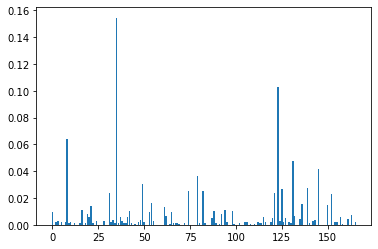

[0.009234369055268522, 0.0, 0.0021594025126719443, 0.0024852549724232336, 0.0, 0.0022520372087311974, 0.0, 0.0022595600224035745, 0.06397114923145306, 0.0012572907422125012, 0.00213935877854596, 0.0, 0.00125606291922206, 0.0, 0.0, 0.0011525165136947934, 0.011325283063724729, 0.0, 0.001662808364824133, 0.008088888141911313, 0.005479692151476155, 0.01408731718694931, 0.001621690008800933, 0.0, 0.003121759955327445, 0.0, 0.0, 0.0, 0.0026967439336151675, 0.0, 0.0, 0.02403929825441351, 0.002307151623922115, 0.003218180726701615, 0.0012625611738286727, 0.15457710430572807, 0.001669763708663105, 0.005496745190755983, 0.002532130984630203, 0.000972435808429982, 0.000972435808429982, 0.006043081396384767, 0.010427592026875517, 0.0012299087296779264, 0.0, 0.0004112810946047955, 0.0, 0.0024343678550266825, 0.0036268002179206792, 0.030456131221018385, 0.0022399269262553855, 0.0, 0.0, 0.009748368845001796, 0.016353314909560285, 0.0024782303389010336, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013589817619512536, 0

In [40]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score= accuracy_score(y_test, y_pred) * 100
print(score)
report_dt=classification_report(y_test, y_pred)
print(report_dt)
print(confusion_matrix(y_test,y_pred))
pyplot.bar(range(len(dt.feature_importances_)), dt.feature_importances_)
pyplot.show()
print(list(dt.feature_importances_))


# LOGISTIC REGRESSION


In [39]:
logreg=LogisticRegression(solver='liblinear',multi_class='ovr')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
score= accuracy_score(y_test, y_pred) * 100
print(score)
report_logreg=classification_report(y_test, y_pred)
print(report_logreg)
print(confusion_matrix(y_test,y_pred))
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

95.75757575757575
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       554
         1.0       0.89      0.84      0.86       106

    accuracy                           0.96       660
   macro avg       0.93      0.91      0.92       660
weighted avg       0.96      0.96      0.96       660

[[543  11]
 [ 17  89]]
Optimization terminated successfully.
         Current function value: 0.109863
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                    168   No. Observations:                 6599
Model:                          Logit   Df Residuals:                     6433
Method:                           MLE   Df Model:                          165
Date:                Sun, 01 Mar 2020   Pseudo R-squ.:                  0.7444
Time:                        23:46:28   Log-Likelihood:                -724.99
converged:                       True   LL-Null:       

# RANDOM FOREST

98.48484848484848
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       554
         1.0       0.98      0.92      0.95       106

    accuracy                           0.98       660
   macro avg       0.98      0.96      0.97       660
weighted avg       0.98      0.98      0.98       660

[[552   2]
 [  8  98]]


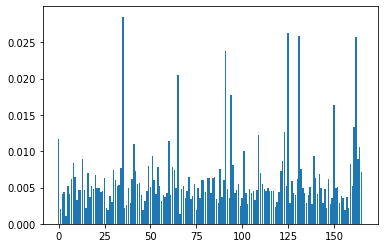

In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score= accuracy_score(y_test, y_pred) * 100
print(score)
report_rf=classification_report(y_test, y_pred)
print(report_rf)
print(confusion_matrix(y_test,y_pred))
pyplot.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
pyplot.show()

# SVM

In [22]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score= accuracy_score(y_test, y_pred) * 100
print(score)
report_svm=classification_report(y_test, y_pred)
print(report_svm)
print(confusion_matrix(y_test,y_pred))

90.0
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       554
         1.0       1.00      0.38      0.55       106

    accuracy                           0.90       660
   macro avg       0.95      0.69      0.75       660
weighted avg       0.91      0.90      0.88       660

[[554   0]
 [ 66  40]]


# CROSS VALIDATIONS / 10 - FOLD

In [ ]:
from sklearn.model_selection import cross_val_score
print("DECISION_TREE:" ,cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring ="accuracy").mean())
print("LOGISTIC_REGRESSION:" ,cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=10, scoring = "accuracy").mean())
print("SUPPORT_VECTOR_MACHINES:" ,cross_val_score(SVC(gamma='auto'), X, y, cv=10, scoring ="accuracy").mean())
print("RANDOM_FOREST:" ,cross_val_score(RandomForestClassifier(n_estimators=40), X, y, cv=10, scoring ="accuracy").mean())
